In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Data Reading
Read the data from the dataset (CSV file) and convert it into a dataframe

In [3]:
path = "./telco-customer-churn-by-IBM.csv"
churn_df = pd.read_csv(path)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = churn_df.copy()
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

##### Data Cleaning

TotalCharges has 11 NaN values, so we will replace by the mean values

In [7]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, 0)

In [9]:
df['TotalCharges'].isnull().sum()

0

In [10]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [11]:
df = df.drop(['customerID'], axis=1 )
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [86]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [87]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques.head()

,Unique Values
Variable,
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2


In [88]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [89]:
dummies = pd.get_dummies(df[['gender', 'Partner','Dependents', 'PhoneService','PaperlessBilling']])
merged = pd.concat([df, dummies], axis='columns')
merged = merged.drop(['gender', 'Partner','Dependents', 'PhoneService','PaperlessBilling'], axis=1)
merged.head(2)

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,7590-VHVEG,0,1,No phone service,DSL,No,Yes,No,No,No,...,1,0,0,1,1,0,1,0,0,1
1,5575-GNVDE,0,34,No,DSL,Yes,No,Yes,No,No,...,0,1,1,0,1,0,0,1,1,0


In [90]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [91]:
dummies = pd.get_dummies(merged[['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']])
merged = pd.concat([merged, dummies], axis='columns')
merged = merged.drop(
  ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection', 
  'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'], axis=1)
merged.head(2)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,No,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [92]:
numeric_variables = list(set(df.columns) - set(categorical_variables) - set(binary_variables))
numeric_variables

['customerID', 'MonthlyCharges', 'tenure', 'TotalCharges']

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'tenure'}>]], dtype=object)

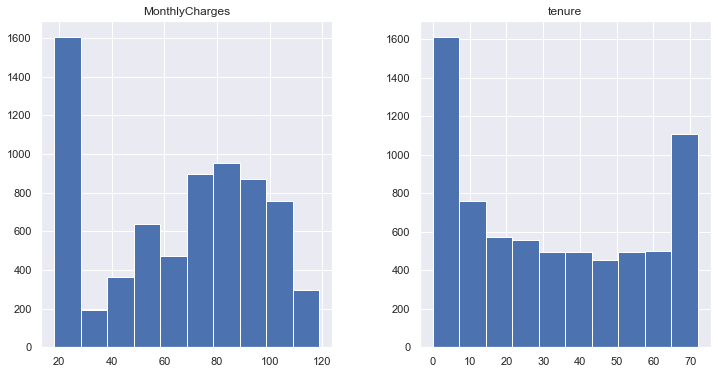

In [93]:
merged[numeric_variables].hist(figsize=(12, 6))

In [94]:
import seaborn as sns
sns.boxplot(df['TotalCharges'])

/opt/anaconda3/envs/downgrade/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



TypeError: Horizontal orientation requires numeric `x` variable.

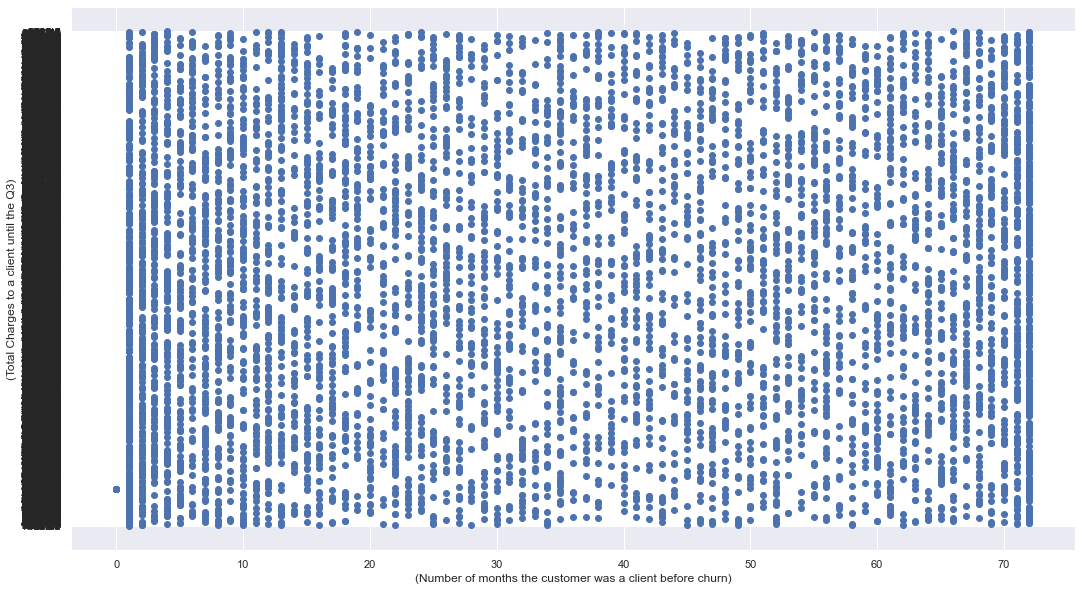

In [95]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['tenure'], df['TotalCharges'])
 
# x-axis label
ax.set_xlabel('(Number of months the customer was a client before churn)')
 
# y-axis label
ax.set_ylabel('(Total Charges to a client until the Q3)')
plt.show()

In [96]:
# Create a list of float colums to check for skewing
float_mask = df.dtypes == np.float64
float_cols = df.columns[float_mask]

skew_limit = 0.075 # define a limit above which we will log transform
skew_vals = merged[float_cols].skew()

In [97]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols
skew_cols.index.to_list()
skew_cols.index.values

array(['MonthlyCharges'], dtype=object)

In [98]:
skew_vals.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}).query(f'abs(Skew) > {skew_limit}')

,Skew
MonthlyCharges,-0.220524


In [99]:
for col in skew_cols.index.values:
    if col == "Churn":
        continue
    merged[col] = merged[col].apply(np.log1p)

In [100]:
merged.head(2)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,3.429137,29.85,No,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,4.059581,1889.5,No,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [101]:
merged['TotalCharges'].isnull().sum()

0

### MACHINE LEARNING

Apply machine learning techniques to the dataset

In [102]:
y_col = 'Churn'

# Split the data that is not one-hot encoded
feature_cols = [x for x in merged.columns if x != y_col]
X_data = merged[feature_cols]
y_data = merged[y_col]

In [103]:
X_data

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,3.429137,29.85,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,4.059581,1889.5,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,4.004602,108.15,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,3.768153,1840.75,0,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,4.272491,151.65,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,4.452019,1990.5,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,72,4.646312,7362.9,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,11,3.421000,346.45,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,4,4.322807,306.6,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


In [104]:
y_data

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [105]:
X = np.asarray(X_data)
X[0:5]

array([['7590-VHVEG', 0, 1, 3.4291367503513968, '29.85', 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       ['5575-GNVDE', 0, 34, 4.059580569785761, '1889.5', 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       ['3668-QPYBK', 0, 2, 4.00460218672124, '108.15', 0, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       ['7795-CFOCW', 0, 45, 3.768152635008444, '1840.75', 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       ['9237-HQITU', 0, 2, 4.272490747605575, '151.65', 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=object

In [106]:
y = np.asarray(y_data)
y [0:5]

array(['No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [107]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

ValueError: could not convert string to float: '7590-VHVEG'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
X_data.isnull().sum()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
INTERCEPT = LR.intercept_
COEF = LR.coef_
print(INTERCEPT)
print(COEF)
LR.score(X_train,y_train)

In [ ]:
yhat = LR.predict(X_test)
yhat

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

### EVALUATION

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat, pos_label=0)

### CONFUSION MATRIX

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat, labels=[1,0]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
matrix = pd.DataFrame(cnf_matrix, columns=['churn=1','churn=0'], index=['churn=1','churn=0'])
matrix

In [ ]:
import plotly.figure_factory as ff
matrix_cnf = pd.DataFrame(cnf_matrix, columns=['churn=1','churn=0'], index=['churn=1','churn=0'])



# set up figure 
fig = ff.create_annotated_heatmap(cnf_matrix, x=['churn=1','churn=0'], y=['churn=1','churn=0'], colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                #xaxis = dict(title='x'),
                #yaxis = dict(title='x')
                )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True

fig.show()

In [ ]:
print (classification_report(y_test, yhat))

In [ ]:
classification_report(y_test, yhat,output_dict=True)

In [ ]:
data = pd.DataFrame.from_dict(classification_report(y_test, yhat,output_dict=True))
data

# LOG LOSS

In [50]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.436374545737711

In [51]:
df.select_dtypes('float')
df.select_dtypes('int')
df.select_dtypes('object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [52]:
num_cols = df.select_dtypes('number').columns
print(num_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [53]:
skew_limit = 0.75
# measure of the skewness of all features
skew_vals = df[num_cols].skew()

In [54]:
#select the features with skewness higher than the skew limit of 0,75
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols

SeniorCitizen    1.833633
Churn            1.063031
TotalCharges     0.963235
dtype: float64

### DATA VISUALIZATION

In [55]:
data2 = df[(df["yyyy"] == year) & (df["mm"] <= month)]

    data2 = (
        data2.groupby(["item_description"])[["sale_dollars", "bottles_sold"]]
        .sum()
        .reset_index()
    )
    data2["perc"] = (data2["sale_dollars"] / (data2["sale_dollars"].sum()) * 100).round(
        2
    )
    data2.sort_values(by=["sale_dollars"], ascending=True)[-1:]
    products = data2.sort_values(by=["sale_dollars"], ascending=True)[-8:]

IndentationError: unexpected indent (1401151524.py, line 3)

### CORRELATION MATRIX

Determine the correlation matrix among all features (X variables) to understand what features has more impact on the Traget (customer churn)

In [108]:
[[i, list(churn_df[i].unique())] for i in categorical_variables]

[['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']]]

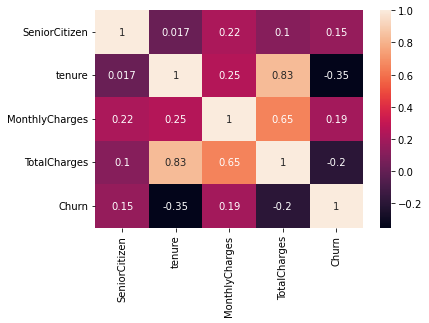

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# taking all rows with int or float numbers
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [58]:
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Churn           tenure           -0.352229
tenure          Churn            -0.352229
TotalCharges    Churn            -0.198324
Churn           TotalCharges     -0.198324
SeniorCitizen   tenure            0.016567
tenure          SeniorCitizen     0.016567
SeniorCitizen   TotalCharges      0.103006
TotalCharges    SeniorCitizen     0.103006
Churn           SeniorCitizen     0.150889
SeniorCitizen   Churn             0.150889
Churn           MonthlyCharges    0.193356
MonthlyCharges  Churn             0.193356
                SeniorCitizen     0.220173
SeniorCitizen   MonthlyCharges    0.220173
tenure          MonthlyCharges    0.247900
MonthlyCharges  tenure            0.247900
                TotalCharges      0.651174
TotalCharges    MonthlyCharges    0.651174
tenure          TotalCharges      0.826178
TotalCharges    tenure            0.826178
SeniorCitizen   SeniorCitizen     1.000000
MonthlyCharges  MonthlyCharges    1.000000
tenure          tenure            1.000000
TotalCharge

In [59]:
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

Churn         tenure         -0.352229
tenure        Churn          -0.352229
TotalCharges  Churn          -0.198324
Churn         TotalCharges   -0.198324
dtype: float64


In [60]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

MonthlyCharges  TotalCharges      0.651174
TotalCharges    MonthlyCharges    0.651174
tenure          TotalCharges      0.826178
TotalCharges    tenure            0.826178
SeniorCitizen   SeniorCitizen     1.000000
MonthlyCharges  MonthlyCharges    1.000000
tenure          tenure            1.000000
TotalCharges    TotalCharges      1.000000
Churn           Churn             1.000000
dtype: float64


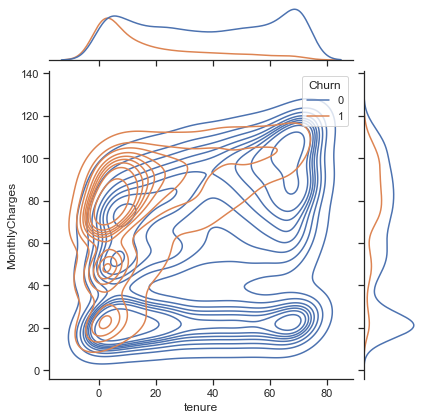

In [61]:
import seaborn as sns
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="tenure", y="MonthlyCharges", hue="Churn",
    kind="kde",
)

In [62]:
data2 = df[(df["yyyy"] == year) & (df["mm"] <= month)]

    data2 = (
        data2.groupby(["item_description"])[["sale_dollars", "bottles_sold"]]
        .sum()
        .reset_index()
    )
    data2["perc"] = (data2["sale_dollars"] / (data2["sale_dollars"].sum()) * 100).round(
        2
    )
    data2.sort_values(by=["sale_dollars"], ascending=True)[-1:]
    products = data2.sort_values(by=["sale_dollars"], ascending=True)[-8:]

IndentationError: unexpected indent (1401151524.py, line 3)

#### Dashboard Indicators

In [ ]:
# Customer Churn

(df['Churn'] == 1).sum()
df['Churn'].count()

churn_rate = (df['Churn'] == 1).sum()/df["Churn"].count()*100
return_rate = 100-churn_rate

recurring_revenue = df[df['Churn'] == 1]['TotalCharges'].sum()/(df['TotalCharges'].sum())*100
MRR = df[df['Churn'] == 1]['TotalCharges'].sum()

risk_customers = len(df[(df['Churn'] == 0) & (df['tenure'] < 10) ])
income_risk_customers = df[(df['Churn'] == 0) & (df['tenure'] < 10) ]['MonthlyCharges'].sum()

print("Churn Rate: ", churn_rate)
print("Retention Rate: ", return_rate)
print("Recurring Revenue: ", recurring_revenue)
print("MRR: ", MRR)
print("Risk Customers: ", risk_customers)
print("Monthly Income of Risk Customers: ", income_risk_customers)


In [ ]:
# gender_churn = 
data = df[(df['Churn'] == 1) & (df['gender'] == 'Male')]
data2 = (data.groupby(['tenure'])['MonthlyCharges']).sum().reset_index()
data2

In [ ]:
import seaborn as sns
sns.set_theme()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="tenure", y="TotalCharges", hue="Contract",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Tenure", "Total Charges")

/opt/anaconda3/envs/downgrade/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/envs/downgrade/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



[Text(0, 0.5, '')]

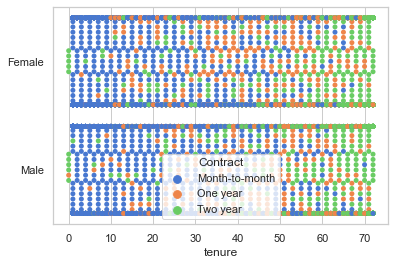

In [63]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")


# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="tenure", y="gender", hue="Contract")
ax.set(ylabel="")

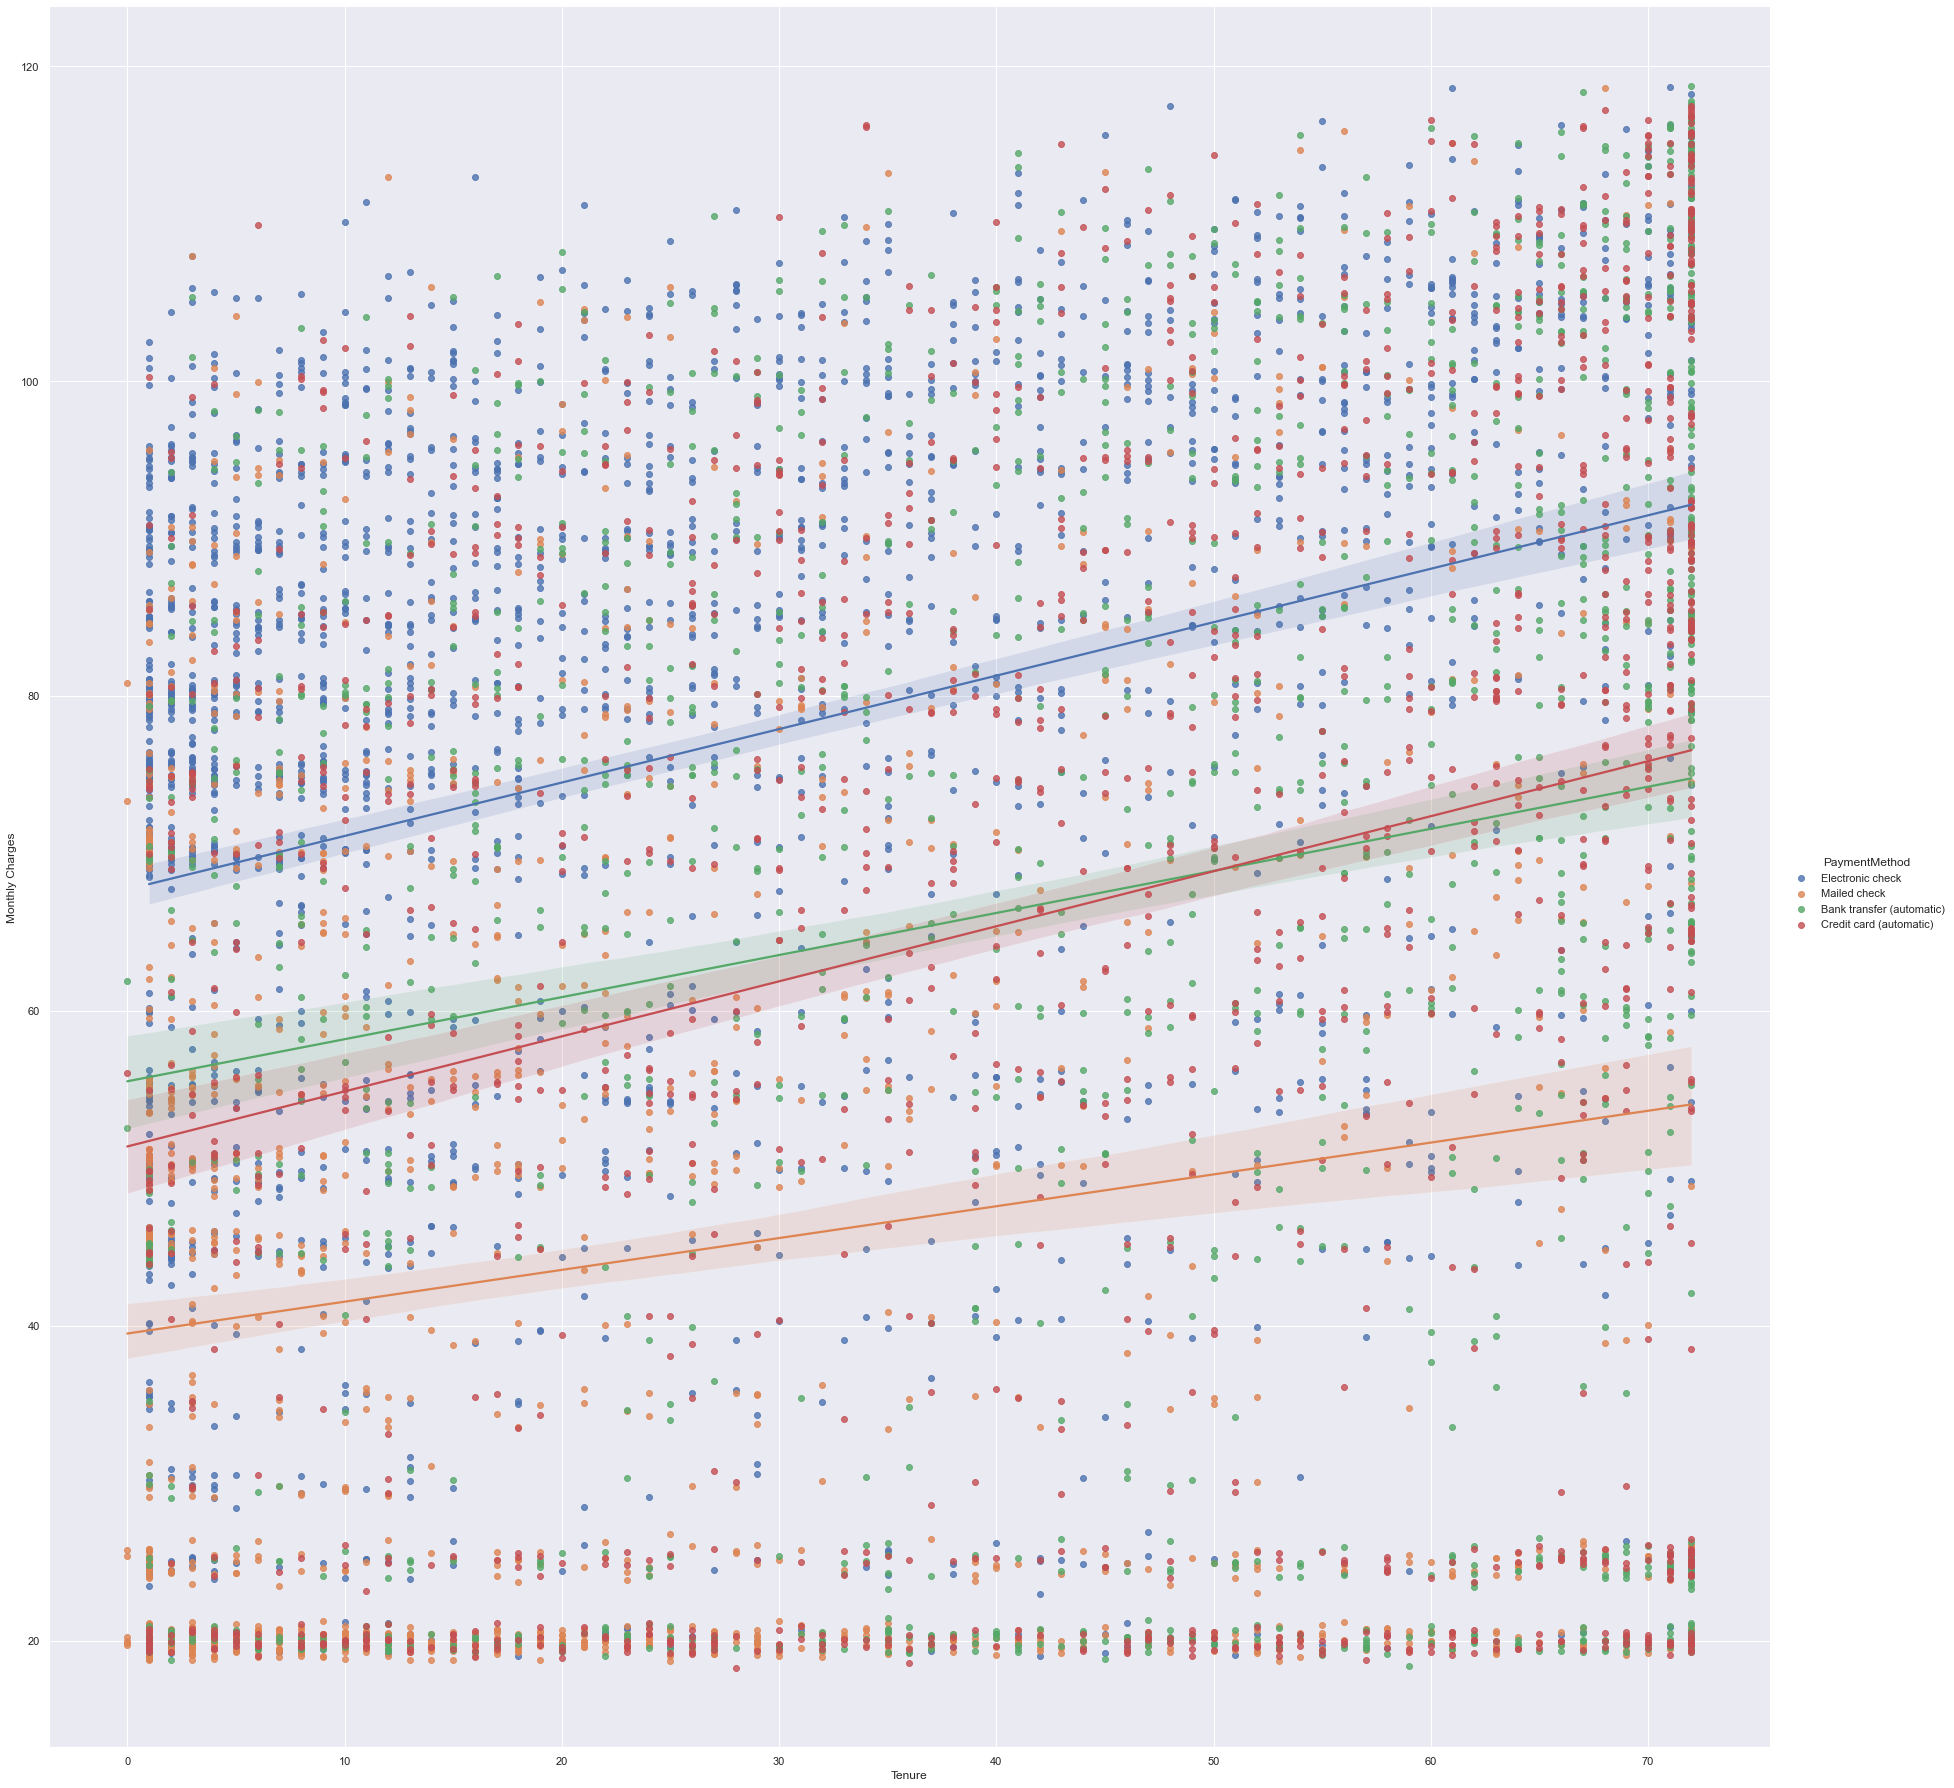

In [64]:
import seaborn as sns
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="tenure", y="MonthlyCharges", hue="PaymentMethod",
    height=25
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Tenure", "Monthly Charges")

In [65]:
senior = [0,1]
gender = ['Female']
partner = ["Yes", "No"]

dff = df[(df['gender'].isin(gender)) & (df['SeniorCitizen'].isin(senior)) & (df['Partner'].isin(partner))]
dfff = dff.groupby(['tenure','Churn'])['MonthlyCharges'].sum().reset_index()
dfff
# negative_churn = dff['Churn'].value_counts()[0]
# positive_churn = dff['Churn'].value_counts()[1]

# print("positive: ", positive_churn)
# print("nagative: ", negative_churn)
# print("total: ", len(dff['Churn']))

,tenure,Churn,MonthlyCharges
0,0,0,282.80
1,1,0,3715.15
2,1,1,11103.75
3,2,0,2947.50
4,2,1,4609.05
...,...,...,...
140,70,1,498.45
141,71,0,5838.35
142,71,1,93.70
143,72,0,14254.50


In [66]:
churn_df = pd.read_csv('telco-customer-churn-by-IBM.csv')
df = churn_df.copy()

gender = df['gender'].unique().tolist()
senior = df['SeniorCitizen'].unique().tolist()
tenure = df['tenure'].unique().tolist()

print(gender)
print(senior)
print(tenure)

['Female', 'Male']
[0, 1]
[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]


In [67]:
gender

['Female', 'Male']

In [62]:
df['gender'].isin(gender)

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Name: gender, Length: 7043, dtype: bool

# Customer Persona

In [63]:
# gender_churn = 
data = df[(df['Churn'] == 1) & (df['gender'] == 'Male')]
data2 = (data.groupby(['tenure'])['MonthlyCharges']).sum().reset_index()
data2

,tenure,MonthlyCharges


In [64]:
gender = df[df['Churn']==0]
gender = gender.groupby(['gender'])['Churn'].count().reset_index()
gender['%'] = gender['Churn']/gender['Churn'].sum()*100
gender

,gender,Churn,%


In [65]:
partner = df[df['Churn']==0]
partner = partner.groupby(['Partner'])['Churn'].count().reset_index()
partner['%'] = partner['Churn']/gender['Churn'].sum()*100
partner

,Partner,Churn,%


In [66]:
senior = df[df['Churn']==0]
senior = senior.groupby(['SeniorCitizen'])['Churn'].count().reset_index()
senior['%'] = senior['Churn']/senior['Churn'].sum()*100
senior

,SeniorCitizen,Churn,%


In [67]:
persona = df.copy()
persona

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# K-MEANS Clustering
## Customer Segmentation

In [68]:
from sklearn.cluster import KMeans

In [69]:
cluster = df.copy()
cluster = cluster[cluster['Churn']==0]
cluster

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [70]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      object 
 1   gender            0 non-null      object 
 2   SeniorCitizen     0 non-null      int64  
 3   Partner           0 non-null      object 
 4   Dependents        0 non-null      object 
 5   tenure            0 non-null      int64  
 6   PhoneService      0 non-null      object 
 7   MultipleLines     0 non-null      object 
 8   InternetService   0 non-null      object 
 9   OnlineSecurity    0 non-null      object 
 10  OnlineBackup      0 non-null      object 
 11  DeviceProtection  0 non-null      object 
 12  TechSupport       0 non-null      object 
 13  StreamingTV       0 non-null      object 
 14  StreamingMovies   0 non-null      object 
 15  Contract          0 non-null      object 
 16  PaperlessBilling  0 non-null      object 
 17  PaymentMe

In [71]:
cluster['gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

In [72]:
X = cluster.iloc[:,[4,17]].values

In [73]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [ ]:
len(wcss)

In [74]:
len(range(1,11))

10

In [75]:
data = pd.DataFrame({'Ncluster' : range(1,11), 'wcss' : wcss}, columns=['Ncluster','wcss'])
data

ValueError: All arrays must be of the same length

In [76]:
import plotly.express as px

fig = px.line(
            data_frame=data, 
            x='Ncluster', y='wcss',
            color="Churn",
            names='Churn',
            color_discrete_map={'Yes':'lightcyan', 'No':'cyan',},
            title="The Elbow Point Graph",
            template='gridon',
            hover_data=['TotalCharges'], 
            labels={'Total Charges':'TotalCharges'}
          )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)

TypeError: line() got an unexpected keyword argument 'names'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

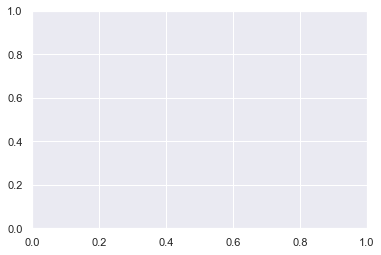

In [77]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [79]:
X[Y==0]

NameError: name 'Y' is not defined

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Tenure - Months until Churn')
plt.ylabel('Spending Score')
plt.show()

NameError: name 'Y' is not defined

<Figure size 576x576 with 0 Axes>

In [81]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
k_means_labels = kmeans.labels_
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
k_means_cluster_centers = kmeans.cluster_centers_

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

<Figure size 432x288 with 0 Axes>

In [77]:
X_to_predict = ['Male', 0, 'Yes', 'Yes', 20, 'No', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 10, 1000]
X_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
res = {}
for key in X_columns:
    for value in X_to_predict:
        res[key] = value
        X_to_predict.remove(value)
        break
    
X = pd.DataFrame(res, index=[0])

X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,20,No,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),10,1000


In [82]:
columns_dummies = X[['gender', 'Partner','Dependents', 'PhoneService','PaperlessBilling','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]
dummies = pd.get_dummies(columns_dummies)
df_form = pd.concat([X, dummies], axis='columns')
df_form = df_form.drop(['gender', 'Partner','Dependents', 'PhoneService','PaperlessBilling','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'], axis=1)
list(df_form)

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_No',
 'PaperlessBilling_No',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'PaymentMethod_Bank transfer (automatic)']